# SVM Base Learner

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import mne
import os
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mne.channels import make_standard_montage
from mne import pick_types
from mne.decoding import CSP


## Setting up pre-requisite information

In [8]:
dir_address = "../../grasp-and-lift-eeg-detection"

from GA_data_preprocessing import *

raw_train = get_data(2,1,dir_address)
raw_test = get_data(2,1,dir_address)


Creating RawArray with float64 data, n_channels=32, n_times=291874
    Range : 0 ... 291873 =      0.000 ...   583.746 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=291874
    Range : 0 ... 291873 =      0.000 ...   583.746 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=291874
    Range : 0 ... 291873 =      0.000 ...   583.746 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=291874
    Range : 0 ... 291873 =      0.000 ...   583.746 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=291874
    Range : 0 ... 291873 =      0.000 ...   583.746 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=291874
    Range : 0 ... 291873 =      0.000 ...   583.746 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=291874
    Range : 0 ... 291873 =      0.000 ...   583.746 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=291874
    Range : 0 ... 2918

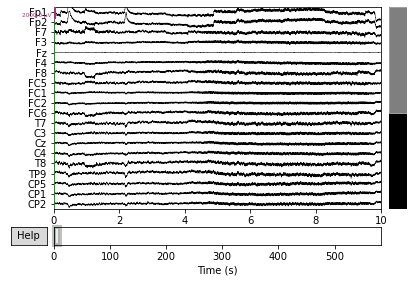

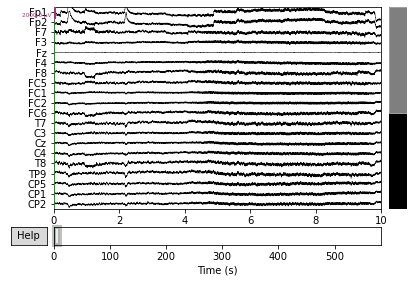

In [10]:
scaling = {"eeg":10e-4}
raw_train.plot(scalings=scaling)
raw_test.plot(scalings=scaling)
plt.show()

In [13]:
df = raw_train.to_data_frame()
test_df = raw_test.to_data_frame()
X_train = df[df.columns[:-6]]
y_train = df[df.columns[-6:]]
X_test = test_df[df.columns[:-6]]
y_test = test_df[df.columns[-6:]]

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel="rbf")
clf.fit(X_train,y_train.loc[:,"HandStart"])

In [27]:
from sklearn.metrics import confusion_matrix
predictions = clf.predict(X_test)

In [26]:
pd.DataFrame(confusion_matrix(y_test.loc[:,'HandStart'],predictions))

,0,1
0,287674,0
1,4200,0
